In [1]:
#import dependencies

import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
#Store file path in a variable and read in csv

file = "MasterYouTube.csv"

master_df = pd.read_csv(file)

#Print head
master_df.head()

,Unnamed: 0,Video Title,Video ID,Number of Days Trending,Time Published,Total Views
0,0,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,j4KvrAUjn6c,29,2018-05-13T18:03:56.000Z,9081270
1,1,Sam Smith - Pray (Official Video) ft. Logic,8h--kFui1JA,29,2018-05-09T17:00:00.000Z,17424422
2,2,Selena Gomez - Back To You (Lyric Video),ulNswX3If6U,28,2018-05-10T16:00:11.000Z,40205404
3,3,Bohemian Rhapsody | Teaser Trailer [HD] | 20th...,6S9c5nnDd_s,28,2018-05-15T13:01:12.000Z,12834122
4,4,Charlie Puth - BOY [Official Audio],iILJvqrAQ_w,28,2018-05-11T04:00:34.000Z,8441561


In [3]:
#Reformat date so I can pull out just the date published and put it in a new column

master_df[['Date Published', 'Publish Time']] = master_df["Time Published"].str.split("T",expand=True)

master_df.head()


,Unnamed: 0,Video Title,Video ID,Number of Days Trending,Time Published,Total Views,Date Published,Publish Time
0,0,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,j4KvrAUjn6c,29,2018-05-13T18:03:56.000Z,9081270,2018-05-13,18:03:56.000Z
1,1,Sam Smith - Pray (Official Video) ft. Logic,8h--kFui1JA,29,2018-05-09T17:00:00.000Z,17424422,2018-05-09,17:00:00.000Z
2,2,Selena Gomez - Back To You (Lyric Video),ulNswX3If6U,28,2018-05-10T16:00:11.000Z,40205404,2018-05-10,16:00:11.000Z
3,3,Bohemian Rhapsody | Teaser Trailer [HD] | 20th...,6S9c5nnDd_s,28,2018-05-15T13:01:12.000Z,12834122,2018-05-15,13:01:12.000Z
4,4,Charlie Puth - BOY [Official Audio],iILJvqrAQ_w,28,2018-05-11T04:00:34.000Z,8441561,2018-05-11,04:00:34.000Z


In [4]:
#Clean it up

date_df = master_df[["Video Title", "Video ID", "Date Published", "Number of Days Trending", "Total Views"]]

date_df.head()

,Video Title,Video ID,Date Published,Number of Days Trending,Total Views
0,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,j4KvrAUjn6c,2018-05-13,29,9081270
1,Sam Smith - Pray (Official Video) ft. Logic,8h--kFui1JA,2018-05-09,29,17424422
2,Selena Gomez - Back To You (Lyric Video),ulNswX3If6U,2018-05-10,28,40205404
3,Bohemian Rhapsody | Teaser Trailer [HD] | 20th...,6S9c5nnDd_s,2018-05-15,28,12834122
4,Charlie Puth - BOY [Official Audio],iILJvqrAQ_w,2018-05-11,28,8441561


In [5]:
#Organize by date published
date_df = date_df.sort_values(["Date Published", "Total Views"], ascending=False)

date_df.head()

,Video Title,Video ID,Date Published,Number of Days Trending,Total Views
5825,Nintendo @ E3 2018: Day 2,8O-ZUXGcuWU,2018-06-14,1,1549110
6086,Courtney Hadwin: 13-Year-Old Golden Buzzer Win...,gPHVLxm8U-0,2018-06-13,1,5829270
5663,Dumbo Official Teaser Trailer,-QPdRfqTnt4,2018-06-13,1,4427381
5749,Nintendo @ E3 2018: Day 1,FchkqXEg0qs,2018-06-13,1,3238183
5973,Fortnite Celebrity Pro-Am | #FortniteProAm,qPEIPu0V8GQ,2018-06-13,1,2183462


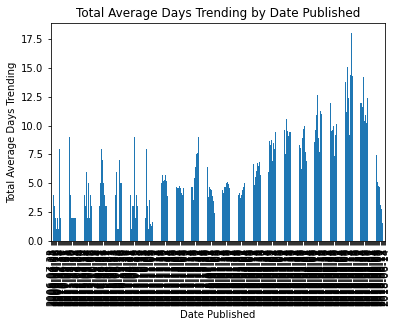

In [6]:
#Find average days trending vs. date published and put into a bar graph



date_df.groupby('Date Published')['Number of Days Trending'].mean().plot(kind='bar')

plt.title("Total Average Days Trending by Date Published")
plt.xlabel("Date Published")
plt.ylabel("Total Average Days Trending")

plt.savefig("OutputCharts/TotalDaysTrendingMeanperDatePublishedBar")

plt.show()

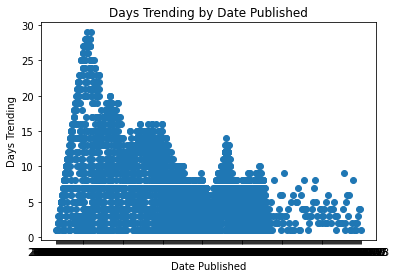

In [7]:
#That doesn't make a whole lot of sense, so I'm trying a scatterplot next

#Scatterplot
plt.scatter(date_df["Date Published"], date_df["Number of Days Trending"])
plt.title("Days Trending by Date Published")
plt.xlabel("Date Published")
plt.ylabel("Days Trending")

plt.savefig("OutputCharts/TotalDaysTrendingperDatePublishedScatter")

plt.show()

In [8]:
#I need to separate them into months to make it look better
#Reformat the master_df again to just take out the month

master_df[['Year Published', 'Month Published', 'Day Published']] = master_df["Time Published"].str.split("-",expand=True)

master_df.head()

,Unnamed: 0,Video Title,Video ID,Number of Days Trending,Time Published,Total Views,Date Published,Publish Time,Year Published,Month Published,Day Published
0,0,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,j4KvrAUjn6c,29,2018-05-13T18:03:56.000Z,9081270,2018-05-13,18:03:56.000Z,2018,05,13T18:03:56.000Z
1,1,Sam Smith - Pray (Official Video) ft. Logic,8h--kFui1JA,29,2018-05-09T17:00:00.000Z,17424422,2018-05-09,17:00:00.000Z,2018,05,09T17:00:00.000Z
2,2,Selena Gomez - Back To You (Lyric Video),ulNswX3If6U,28,2018-05-10T16:00:11.000Z,40205404,2018-05-10,16:00:11.000Z,2018,05,10T16:00:11.000Z
3,3,Bohemian Rhapsody | Teaser Trailer [HD] | 20th...,6S9c5nnDd_s,28,2018-05-15T13:01:12.000Z,12834122,2018-05-15,13:01:12.000Z,2018,05,15T13:01:12.000Z
4,4,Charlie Puth - BOY [Official Audio],iILJvqrAQ_w,28,2018-05-11T04:00:34.000Z,8441561,2018-05-11,04:00:34.000Z,2018,05,11T04:00:34.000Z


In [9]:
#Clean it up
better_df = master_df[["Video Title", "Video ID", "Month Published", "Number of Days Trending", "Total Views"]]

better_df.head()

,Video Title,Video ID,Month Published,Number of Days Trending,Total Views
0,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,j4KvrAUjn6c,05,29,9081270
1,Sam Smith - Pray (Official Video) ft. Logic,8h--kFui1JA,05,29,17424422
2,Selena Gomez - Back To You (Lyric Video),ulNswX3If6U,05,28,40205404
3,Bohemian Rhapsody | Teaser Trailer [HD] | 20th...,6S9c5nnDd_s,05,28,12834122
4,Charlie Puth - BOY [Official Audio],iILJvqrAQ_w,05,28,8441561


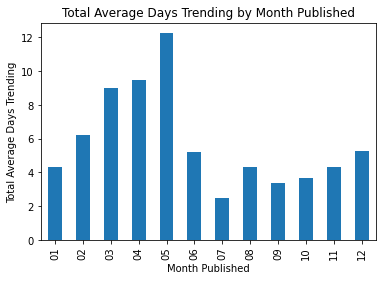

In [10]:
#Let's Try again with month vs. days trending
#Find average days trending vs. date published and put into a bar graph



better_df.groupby('Month Published')['Number of Days Trending'].mean().plot(kind='bar')

plt.title("Total Average Days Trending by Month Published")
plt.xlabel("Month Published")
plt.ylabel("Total Average Days Trending")

plt.savefig("OutputCharts/TotalDaysTrendingMeanperMonthPublishedBar")

plt.show()

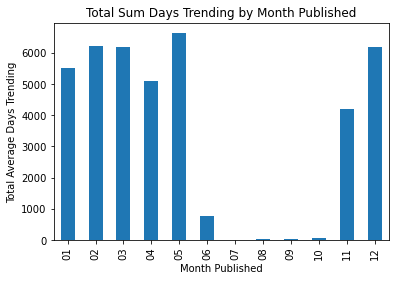

In [11]:
#Do the same with Sum


better_df.groupby('Month Published')['Number of Days Trending'].sum().plot(kind='bar')

plt.title("Total Sum Days Trending by Month Published")
plt.xlabel("Month Published")
plt.ylabel("Total Average Days Trending")

plt.savefig("OutputCharts/TotalDaysTrendingSumperMonthPublishedBar")

plt.show()

In [12]:
#Scatterplot of Days trending/month

#First turn month into a number from a string

better_df['Month Published'] = pd.to_numeric(better_df['Month Published'])

C:\Users\mjbgo\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


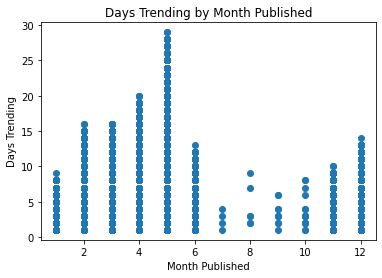

In [13]:



#Scatterplot
plt.scatter(better_df["Month Published"], better_df["Number of Days Trending"])
plt.title("Days Trending by Month Published")
plt.xlabel("Month Published")
plt.ylabel("Days Trending")

plt.savefig("OutputCharts/TotalDaysTrendingperMonthPublishedScatter")

plt.show()

In [14]:
#Correlation
month = better_df["Month Published"]
days = better_df["Number of Days Trending"]

correlation = st.pearsonr(month, days)

print(f"The correlation between the two factors is {round(correlation[0],2)}")

The correlation between the two factors is -0.12


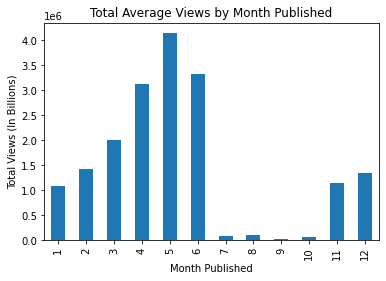

In [15]:
#Do the same for Month published verses views
#Average

better_df.groupby('Month Published')['Total Views'].mean().plot(kind='bar')

plt.title("Total Average Views by Month Published")
plt.xlabel("Month Published")
plt.ylabel("Total Views (In Billions)")

plt.savefig("OutputCharts/TotalViewsMeanperMonthPublishedBar")

plt.show()

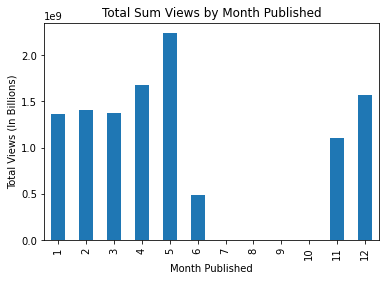

In [16]:
#Find total average views of all videos by date

better_df.groupby('Month Published')['Total Views'].sum().plot(kind='bar')

plt.title("Total Sum Views by Month Published")
plt.xlabel("Month Published")
plt.ylabel("Total Views (In Billions)")

plt.savefig("OutputCharts/TotalViewsSumperMonthPublishedBar")

plt.show()

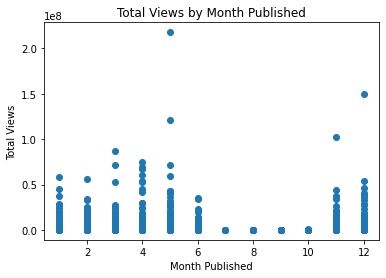

In [17]:
#Scatterplot
plt.scatter(better_df["Month Published"], better_df["Total Views"])
plt.title("Total Views by Month Published")
plt.xlabel("Month Published")
plt.ylabel("Total Views")

plt.savefig("OutputCharts/TotalViewsperMonthPublishedScatter")

plt.show()

In [18]:
#Correlation
month = better_df["Month Published"]
views = better_df["Total Views"]

correlation = st.pearsonr(month, views)

print(f"The correlation between the two factors is {round(correlation[0],2)}")

The correlation between the two factors is -0.02


In [19]:
#Separate out the day of the year
master_df[['Day', 'Time']] = master_df["Day Published"].str.split("T",expand=True)

master_df.head()

,Unnamed: 0,Video Title,Video ID,Number of Days Trending,Time Published,Total Views,Date Published,Publish Time,Year Published,Month Published,Day Published,Day,Time
0,0,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,j4KvrAUjn6c,29,2018-05-13T18:03:56.000Z,9081270,2018-05-13,18:03:56.000Z,2018,05,13T18:03:56.000Z,13,18:03:56.000Z
1,1,Sam Smith - Pray (Official Video) ft. Logic,8h--kFui1JA,29,2018-05-09T17:00:00.000Z,17424422,2018-05-09,17:00:00.000Z,2018,05,09T17:00:00.000Z,09,17:00:00.000Z
2,2,Selena Gomez - Back To You (Lyric Video),ulNswX3If6U,28,2018-05-10T16:00:11.000Z,40205404,2018-05-10,16:00:11.000Z,2018,05,10T16:00:11.000Z,10,16:00:11.000Z
3,3,Bohemian Rhapsody | Teaser Trailer [HD] | 20th...,6S9c5nnDd_s,28,2018-05-15T13:01:12.000Z,12834122,2018-05-15,13:01:12.000Z,2018,05,15T13:01:12.000Z,15,13:01:12.000Z
4,4,Charlie Puth - BOY [Official Audio],iILJvqrAQ_w,28,2018-05-11T04:00:34.000Z,8441561,2018-05-11,04:00:34.000Z,2018,05,11T04:00:34.000Z,11,04:00:34.000Z


In [20]:
#Only keep what I need
best_df = master_df[["Video Title", "Video ID", "Number of Days Trending", "Day", "Total Views"]]

best_df.head()

,Video Title,Video ID,Number of Days Trending,Day,Total Views
0,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,j4KvrAUjn6c,29,13,9081270
1,Sam Smith - Pray (Official Video) ft. Logic,8h--kFui1JA,29,09,17424422
2,Selena Gomez - Back To You (Lyric Video),ulNswX3If6U,28,10,40205404
3,Bohemian Rhapsody | Teaser Trailer [HD] | 20th...,6S9c5nnDd_s,28,15,12834122
4,Charlie Puth - BOY [Official Audio],iILJvqrAQ_w,28,11,8441561


In [21]:
#Convert the day to an int
best_df['Day'] = pd.to_numeric(best_df['Day'])

C:\Users\mjbgo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
#Organize by day
best_df = best_df.sort_values(["Day", "Total Views"], ascending=False)

best_df.head()

,Video Title,Video ID,Number of Days Trending,Day,Total Views
456,Gorillaz - Humility (Official Video),E5yFcdPAGv0,14,31,25016614
452,Clean Bandit - Solo feat. Demi Lovato [Officia...,8JnfIa84TnU,14,31,21250349
638,THE BICYCLE OF SPRINGS,N39uwTykTQk,13,31,6169981
2990,WATCH: The super blue blood moon makes first a...,kUZlz6VbMCg,6,31,5625319
662,Trying $1 Makeup From Wish,LfeEu4_vtfQ,13,31,5558317


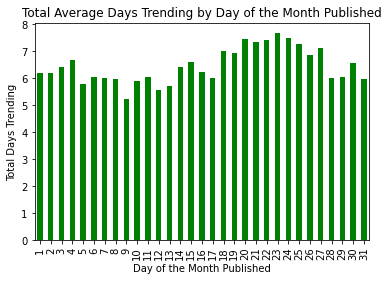

In [23]:
#Create a bar graph that shows day by number of AVERAGE days trending 
best_df.groupby('Day')['Number of Days Trending'].mean().plot(kind='bar', color="green")

plt.title("Total Average Days Trending by Day of the Month Published")
plt.xlabel("Day of the Month Published")
plt.ylabel("Total Days Trending")

plt.savefig("OutputCharts/TotalDaysTrendingMeanperDayofMonthPublishedBar")

plt.show()


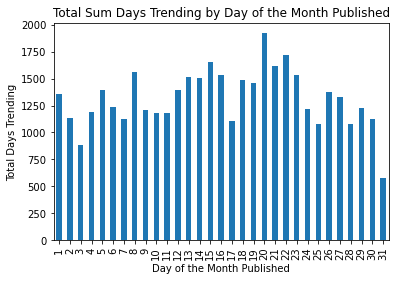

In [24]:
#Create a bar graph that shows day by number of SUM days trending
best_df.groupby('Day')['Number of Days Trending'].sum().plot(kind='bar')

plt.title("Total Sum Days Trending by Day of the Month Published")
plt.xlabel("Day of the Month Published")
plt.ylabel("Total Days Trending")

plt.savefig("OutputCharts/TotalDaysTrendingSumperDayofMonthPublishedBar")

plt.show()


### Both of the charts above show there is not a relationship between the day of the month and the views or days trending

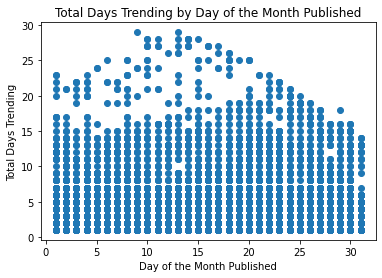

In [25]:
#Scatterplot
plt.scatter(best_df["Day"], best_df["Number of Days Trending"])
plt.title("Total Days Trending by Day of the Month Published")
plt.xlabel("Day of the Month Published")
plt.ylabel("Total Days Trending")

plt.savefig("OutputCharts/TotalDaysTredningperDayofMonthPublishedScatter")

plt.show()

In [26]:
#Correlation
month = best_df["Day"]
views = best_df["Number of Days Trending"]

correlation = st.pearsonr(month, views)

print(f"The correlation between the two factors is {round(correlation[0],2)}")

The correlation between the two factors is 0.07


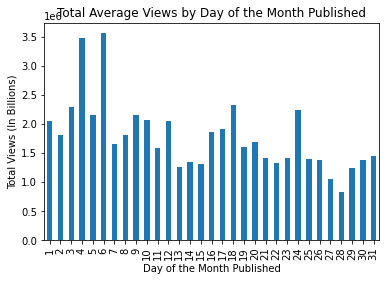

In [27]:
#Create a bar graph that shows day by number of AVERAGE views
best_df.groupby('Day')['Total Views'].mean().plot(kind='bar')

plt.title("Total Average Views by Day of the Month Published")
plt.xlabel("Day of the Month Published")
plt.ylabel("Total Views (In Billions)")

plt.savefig("OutputCharts/TotalViewsMeanperDayofMonthPublishedBar")

plt.show()

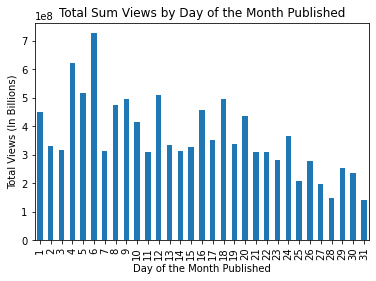

In [28]:
#Create a bar graph that shows day by number of SUM views
best_df.groupby('Day')['Total Views'].sum().plot(kind='bar')

plt.title("Total Sum Views by Day of the Month Published")
plt.xlabel("Day of the Month Published")
plt.ylabel("Total Views (In Billions)")

plt.savefig("OutputCharts/TotalViewsSumperDayofMonthPublishedBar")

plt.show()

### Both of the charts above show there is not a relationship between the day of the month and the views or days trending

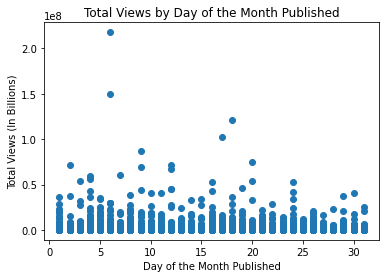

In [29]:
#Scatterplot
plt.scatter(best_df["Day"], best_df["Total Views"])
plt.title("Total Views by Day of the Month Published")
plt.xlabel("Day of the Month Published")
plt.ylabel("Total Views (In Billions)")

plt.savefig("OutputCharts/TotalViewsperDayofMonthPublishedScatter")

plt.show()

In [30]:
#Correlation
month = best_df["Day"]
views = best_df["Total Views"]

correlation = st.pearsonr(month, views)

print(f"The correlation between the two factors is {round(correlation[0],2)}")

The correlation between the two factors is -0.06


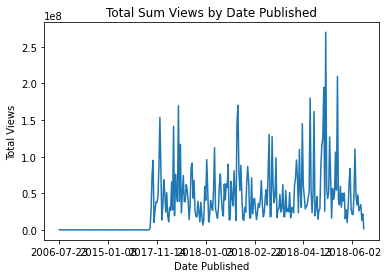

In [31]:
#Create line graph that shows date (x) by views(y) 

master_df.groupby('Date Published')['Total Views'].sum().plot(kind='line')

plt.title("Total Sum Views by Date Published")
plt.xlabel("Date Published")
plt.ylabel("Total Views")

plt.savefig("OutputCharts/TotalViewsSumperDatePublishedLine")

plt.show()

### I was trying to see if there were any long-term trends, but there really isn't...the data is varied throughout.